In [2]:
import numpy as np
import pandas as pd
from helper import generate_splited_dataset, process_abnDateTime
import math
from datetime import datetime
import time
import os
import matplotlib.pyplot as plt

save_directory = '../preprocessed_data_wheel_acc_new/'
emission_title = 'CO2 Rate [g.s-1]'
file_name = [os.path.splitext(f)[0] for f in os.listdir(save_directory)]
file_name = [i for i in file_name if emission_title in i]
file_name

ModuleNotFoundError: No module named 'helper'

In [431]:
A_all = {}
for file_index in range(0, 14):
    A_all[file_index] = np.loadtxt(save_directory + file_name[file_index] + '.txt',
               delimiter=',')

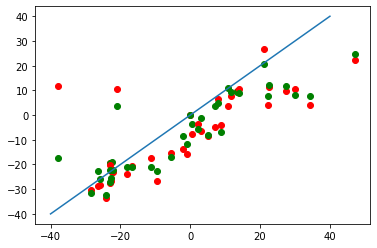

In [25]:
# visualize the best results from bi-lstm with GPS speed + wheel speed as input
import matplotlib.pyplot as plt
data_1 = np.loadtxt('../10_log_curves_gpsv+a.txt', delimiter=',')
data_2 = np.loadtxt('../10_log_curves_gpsv+a+s.txt', delimiter=',')
# data.shape # time, best_results, truth, pi
# plt.figure(figsize=[30,5])
for i in range(len(data_1[:, 0])):
    if i % 60 == 0:
        if i==0:
            pass
        plt.scatter(sum(data_1[i-60:i,2]), sum(data_1[i-60:i,1]),c ='red')
        plt.scatter(sum(data_1[i-60:i,2]), sum(data_2[i-60:i,1]),c ='green')
plt.plot([-40,40],[-40, 40])
# plt.plot(data_1[:,0], data_1[:,2], c='black')
# plt.plot(data_1[:,0], data_1[:,1], c='red')
# plt.plot(data_1[:,0], data_2[:,1], c='green')
plt.show()

In [436]:
A = A_all[0]
time_count = len(A)
GPS_speed = A[:, 1]
WHEEL_speed = A[:, 3]
Emission = A[:, -1]

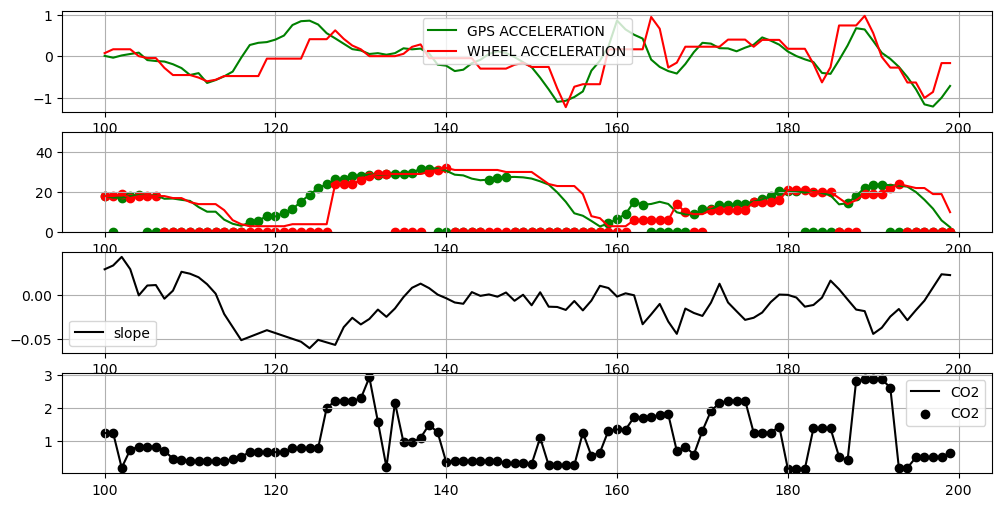

In [497]:
a = 100
b = 200

plt.figure(figsize=[12, 6])
plt.subplot(4, 1, 1)
plt.plot(A[a:b, 0], A[a:b, 2], c='green', label='GPS ACCELERATION')
# plt.plot(A[a:b, 0], (A[a:b, 3]-A[a-1:b-1, 3]) / (3600/1000), c='red', label='ACCELERATION calculated from Wheel speed')
plt.plot(A[a:b, 0], A[a+3:b+3, 4], c='red', label='WHEEL ACCELERATION')
# plt.plot(A[a:b, 0], (A[a:b, 3]-A[a-1:b-1, 3]) / (3600/1000), c='black', label='Calculated based on SPEED')
plt.legend()
plt.grid()
# plt.ylim([-3, 3])
plt.subplot(4, 1, 2)
plt.plot(A[a:b, 0], A[a:b, 1], c='green', label='GPS SPEED ')
plt.plot(A[a:b, 0], A[a:b, 3], c='red', label='WHEEL SPEED')
time = A[a:b, 0]
for i in range(len(time)):
    if A[a:b, 2][i]>=0:
        plt.scatter(A[a:b, 0][i], A[a:b, 1][i], c='green', label='GPS SPEED ')
    else:
        plt.scatter(A[a:b, 0][i], 0, c='green', label='GPS SPEED ')
    if A[a:b, 4][i]>=0:
        plt.scatter(A[a:b, 0][i], A[a:b, 3][i], c='red', label='WHEEL SPEED ')
    else:
        plt.scatter(A[a:b, 0][i], 0, c='red', label='WHEEL SPEED ')
# plt.legend()
plt.grid()
plt.ylim([0, 50])
plt.subplot(4, 1, 3)
plt.plot(A[a:b, 0], A[a:b, -2], c='black',label='slope')
plt.legend()
plt.grid()
plt.subplot(4, 1, 4)
plt.plot(A[a:b, 0], A[a:b, -1], c='black',label='CO2')
plt.scatter(A[a:b, 0], A[a:b, -1], c='black',label='CO2')
plt.legend()
plt.grid()
plt.show()

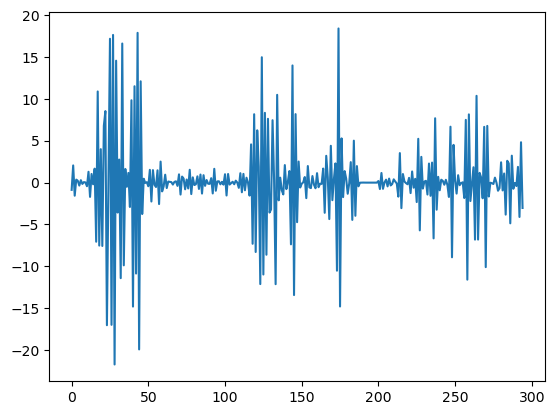

In [483]:
def deri(x):
    n = len(x)
    x_ = x[1:]-x[:-1]
    return x_
g = A[a:b,-1]
plt.plot(deri(deri(deri(deri(deri(g))))))

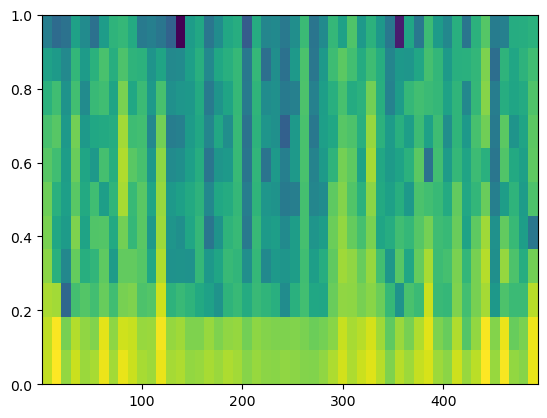

In [439]:
plt.specgram(A[a:b, -1], NFFT=20, noverlap=1)
plt.show()

In [453]:
mean = np.mean(A[0:3000,-1])
var = np.var(A[0:3000,-1])
A_ = (A[0:3000, -1] - mean)/var
A_

array([-0.32551622,  1.09545075,  0.69273931, ..., -0.1693759 ,
        0.6320995 , -0.98040349])

[ 2.55770768e+01 -0.j          6.48167795e+00-19.37269157j
 -3.35378686e+00+18.12772685j  5.75263942e+01 -4.01777127j
  1.22658780e+01-21.37175404j -7.42536423e+00 +8.2205468j
  1.63391166e+01 -3.80735855j  3.79775361e+00 -9.78288593j
 -1.76181817e+01 +8.19891806j -1.42567057e+01 +5.69002821j
 -9.84549359e+00 -3.41797788j -9.99205306e+00 +5.6746565j
 -9.70485879e+00+10.51217173j -6.48256473e+00 -0.37654884j
  1.93058826e+00 +8.62470225j  2.40553453e-02 +5.15025884j
 -6.25121253e+00 -1.30063954j  5.13276196e+00 +2.14714956j
  8.74960084e+00 -2.58137569j -9.30880178e+00 +2.46662128j
  3.21856585e+00 -9.42149371j  3.65515076e+00 -3.26358803j
 -9.36696421e+00 +6.12347137j -2.37327068e+00 -7.76350074j
 -1.15868827e+01 +1.5563022j  -4.10508424e+00 +4.80238219j
 -4.80004509e+00 +0.45880452j -8.95920809e+00 +2.22166367j
  1.28650982e+00 +5.38418523j -7.48402597e+00 +1.93654543j
  6.54946798e-01 +1.07676425j  2.53617932e-01 +2.77082923j
 -7.70662242e+00 -3.68484136j  7.24752356e+00 +0.62321345j

/Users/chogaliu/miniforge3/envs/pytorch/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/chogaliu/miniforge3/envs/pytorch/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


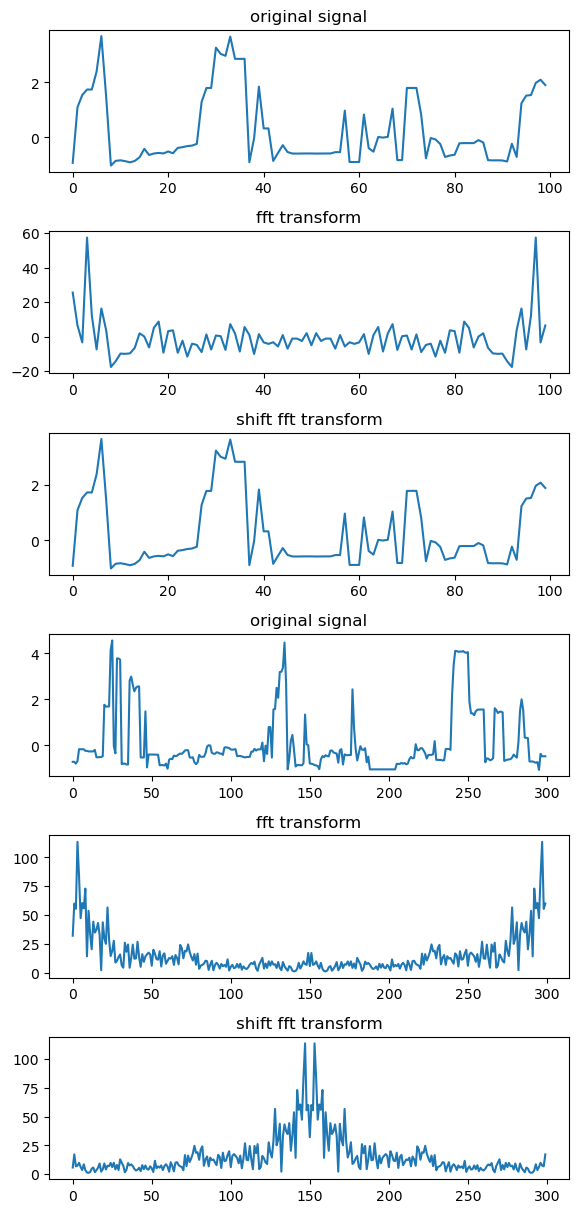

In [474]:

plt.figure(figsize=[6,12])
from scipy.fftpack import fft, fftshift, ifft
from scipy.fftpack import fftfreq
a = 1000
b = 1100
Y = A_[a:b]

ax = plt.subplot(611)
ax.set_title('original signal')
plt.tight_layout()
plt.plot(Y)

ax =plt.subplot(612)
ax.set_title('fft transform')
plt.plot(fft(Y))
print(fft(Y))


shift_ = fftshift(fft(Y))
ax = plt.subplot(613)
ax.set_title('shift fft transform')
# plt.plot(fft(Y).real)
# plt.plot(ifft(shift_))
plt.plot(ifft(fft(Y)))

a = 2300
b = 2600

Y = A_[a:b]
ax = plt.subplot(614)
ax.set_title('original signal')
plt.tight_layout()
plt.plot(Y)

ax =plt.subplot(615)
ax.set_title('fft transform')
plt.plot(np.abs(fft(Y)))

shift_ = fftshift(fft(Y))
ax = plt.subplot(616)
ax.set_title('shift fft transform')
plt.plot(np.abs(shift_))



In [351]:
A_all_GPS_acce = {}
A_all_WHEEL_acce = {}
A_all_Acce = {}
A_all_GPS_speed = {}
A_all_WHEEL_speed = {}
A_all_Emission = {}
for i in range(0,14):
    A = A_all[i]
    A_all_Acce[i] = A[3:, 4] 
    # A_all_GPS_acce[i] = (A[:-1, 1] - A[1:, 1])[:-2]/(3600/1000)
    A_all_GPS_acce[i] = A[:-3, 2]
    A_all_WHEEL_acce[i] = (A[:-1, 3] - A[1:, 3])[:-2]/(3600/1000)
    A_all_Acce[i] = A[3:, 4]
    # time_count = len(A)
    A_all_GPS_speed[i] = A[:-3, 1]
    A_all_WHEEL_speed[i] = A[:-3, 3]
    A_all_Emission[i] = A[:-3, -1]


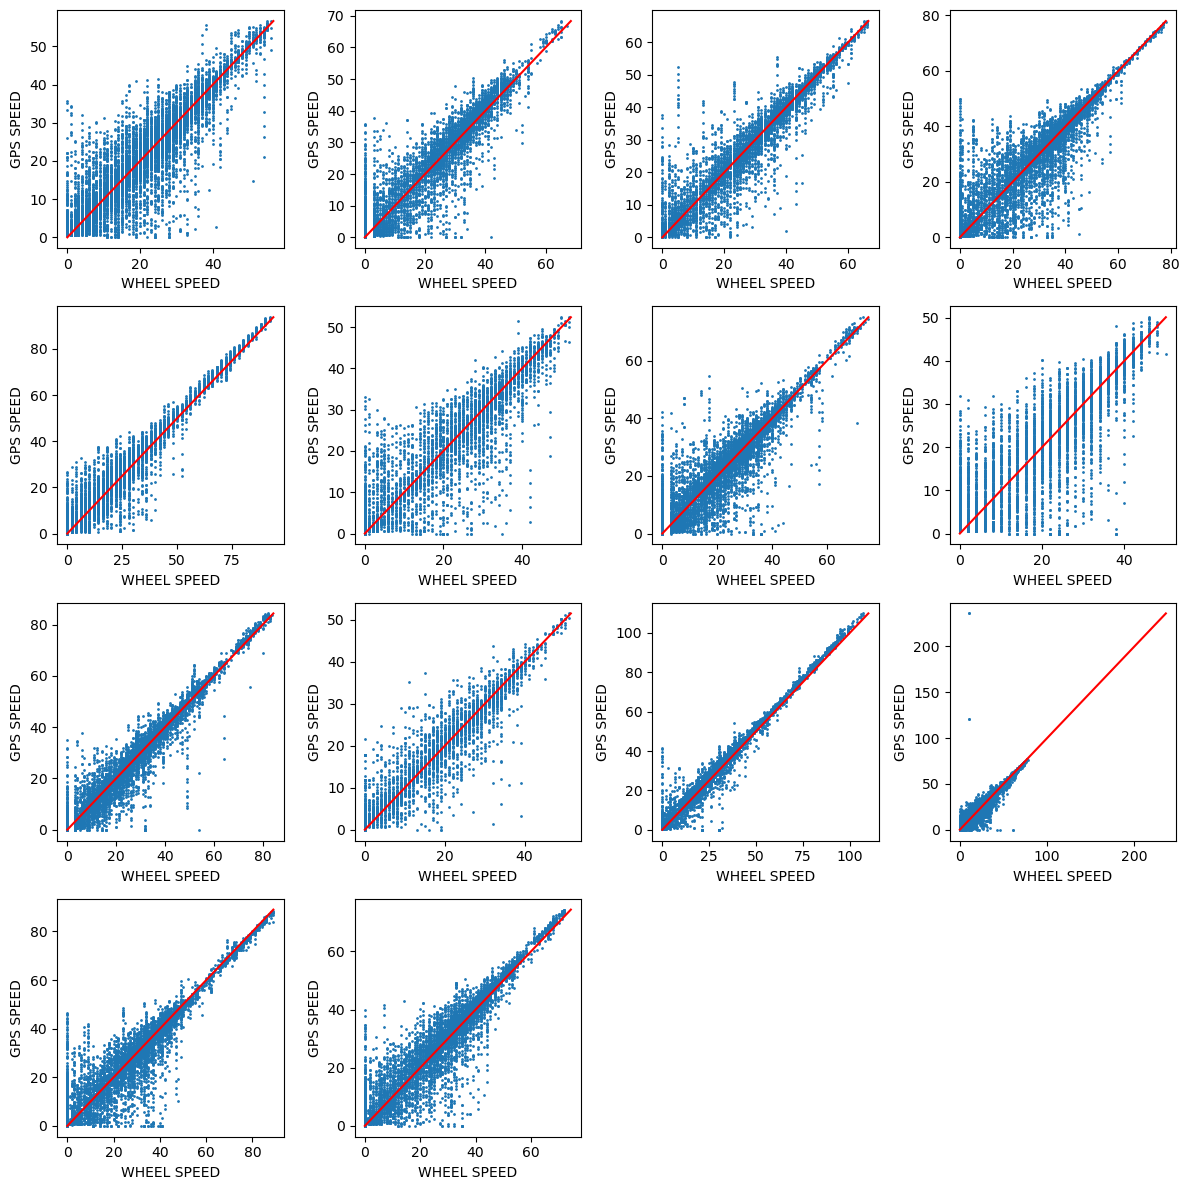

In [383]:

plt.figure(figsize=[12,12])
for i in range(0,14):
    plt.subplot(4,4,i+1)
    plt.scatter(A_all_WHEEL_speed[i],A_all_GPS_speed[i], s=1)
    m = max([max(A_all_WHEEL_speed[i]),max(A_all_GPS_speed[i])])
    plt.plot([0, m], [0, m], color='red')
    # plt.title(file_name[i].split('_')[0])
    plt.ylabel('GPS SPEED')
    plt.xlabel('WHEEL SPEED')
    plt.tight_layout()


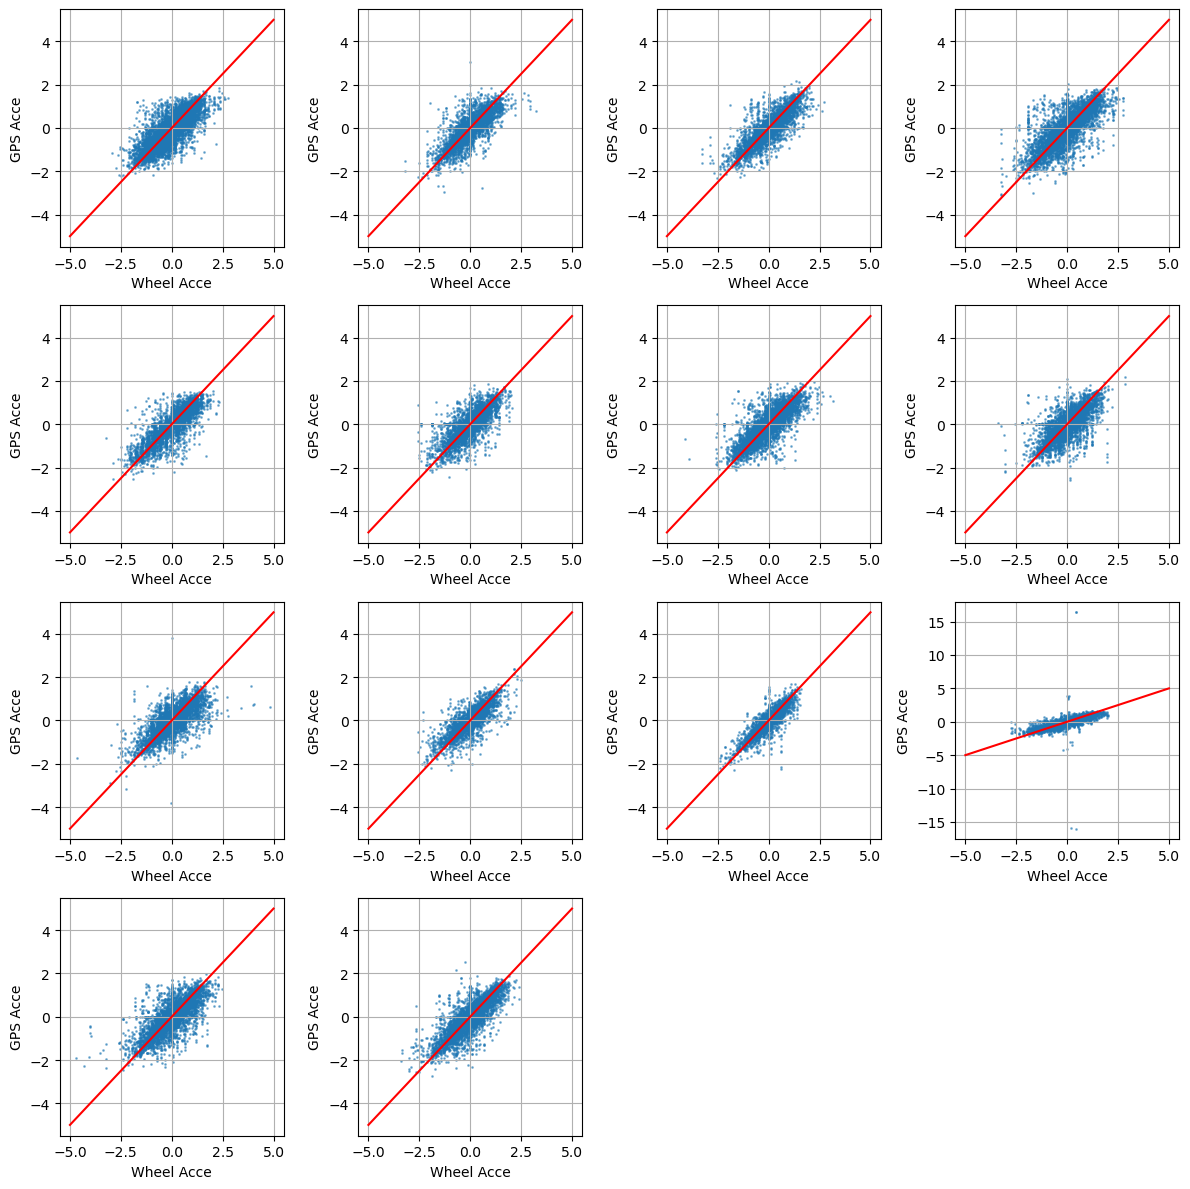

In [382]:
plt.figure(figsize=[12,12])
for i in range(0,14):
    plt.subplot(4,4,i+1)
    plt.scatter(A_all_Acce[i],A_all_GPS_acce[i], s=1, alpha=0.5)
    # plt.scatter(A_all_Acce[i],A_all_WHEEL_acce[i], s=1,c='red',alpha=0.5)
    m = max([max(A_all_WHEEL_acce[i]),max(A_all_GPS_acce[i])])
    plt.plot([-5, 5], [-5, 5], color='red')
    # plt.title(file_name[i].split('_')[0])
    plt.grid()
    plt.tight_layout()
    plt.ylabel('GPS Acce')
    plt.xlabel('Wheel Acce')

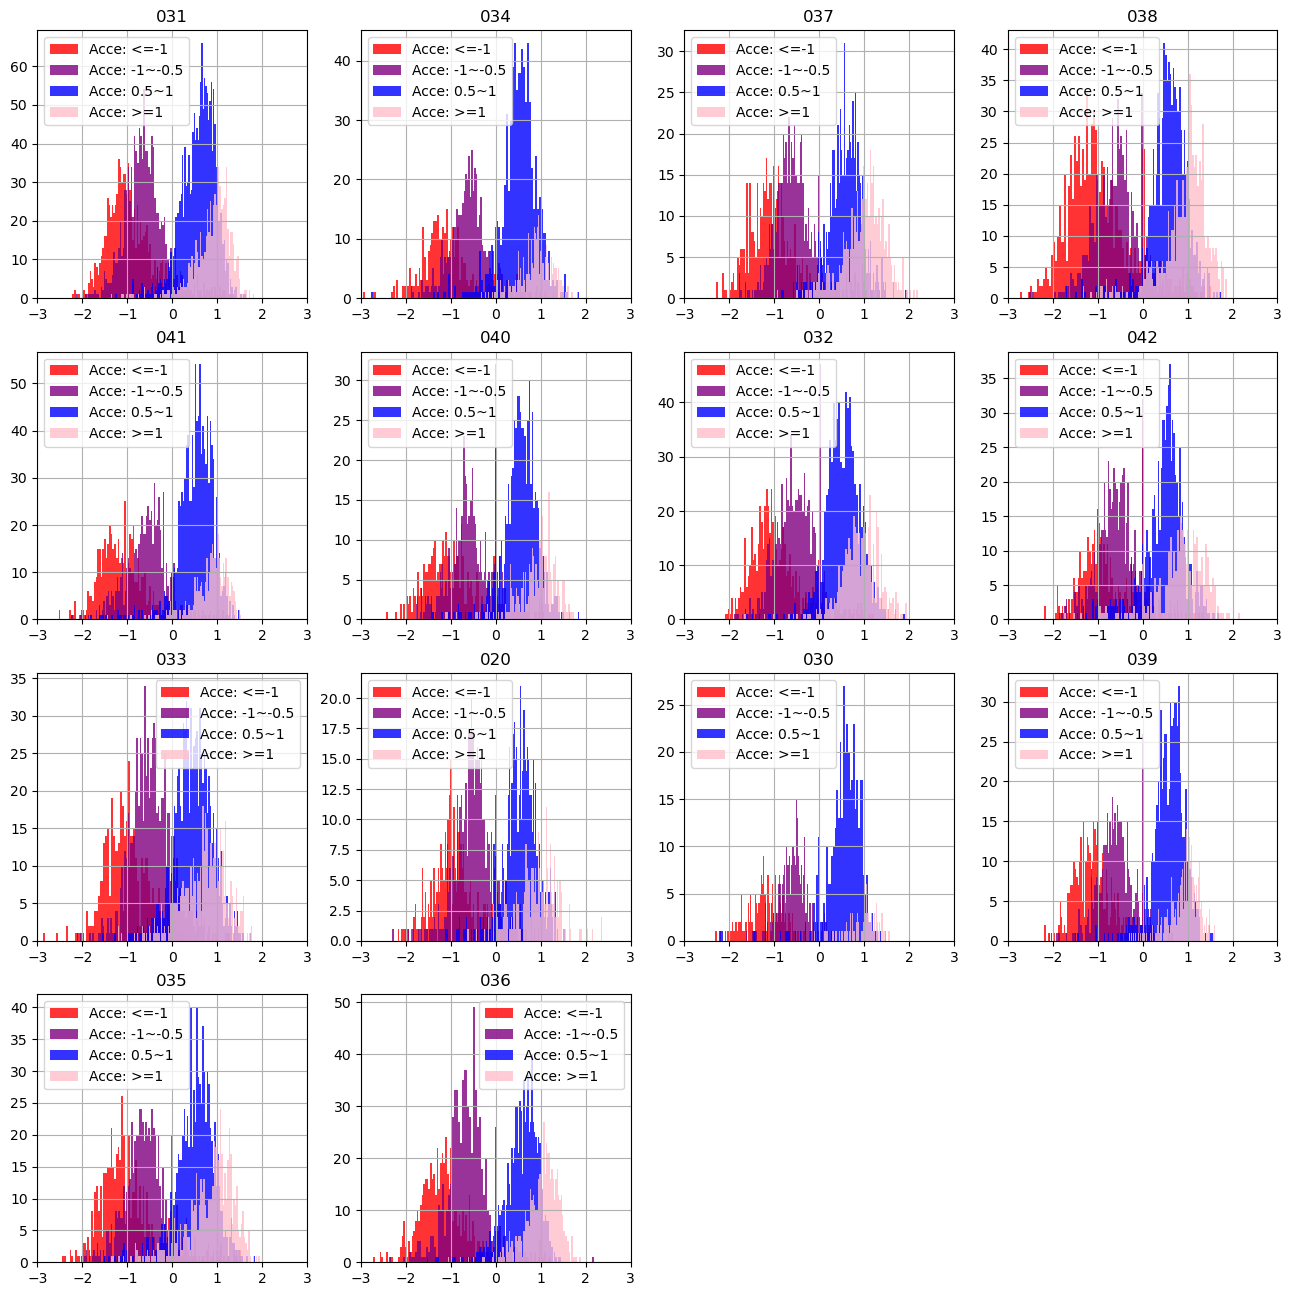

In [356]:
def transfer(x):
    return set(x.tolist())

plt.figure(figsize=[16,16])
for i in range(0,14):
    plt.subplot(4,4,i+1)
    index_1 = transfer(np.where(A_all_Acce[i] <= -1)[0])
    index_2 = transfer(np.where(A_all_Acce[i] <= -0.5)[0])
    index_3 = transfer(np.where(A_all_Acce[i] <= 0)[0])
    index_4 = transfer(np.where(A_all_Acce[i] <= 0.5)[0])
    index_5 = transfer(np.where(A_all_Acce[i] <= 1)[0])
    index_6 = transfer(np.where(A_all_Acce[i] <= 4)[0])
    a = list(index_1)
    b = list(index_2-index_1)
    c = list(index_3-index_2)
    d = list(index_4-index_3)
    e = list(index_5-index_4)
    f = list(index_6-index_5)
    plt.hist(A_all_GPS_acce[i][a], bins=100, color='red', alpha=0.8, label='Acce: <=-1')
    plt.hist(A_all_GPS_acce[i][b], bins=100, color='purple', alpha=0.8, label='Acce: -1~-0.5')
    # plt.hist(A_all_GPS_acce[i][c], bins=30, color='green', alpha=0.8, label='Acce: -0.5~0')
    # plt.hist(A_all_GPS_acce[i][d], bins=30, color='black', alpha=0.8,label='Acce: 0~0.5')
    plt.hist(A_all_GPS_acce[i][e], bins=100, color='blue', alpha=0.8,label='Acce: 0.5~1')
    plt.hist(A_all_GPS_acce[i][f], bins=100, color='pink', alpha=0.8,label='Acce: >=1')
    plt.xlim([-3,3])
    ax = plt.gca()
    # ax.set_yscale('log')
    plt.title(file_name[i].split('_')[0])
    plt.grid()
    plt.legend()
    # plt.ylabel('GPS Acce')
    # plt.xlabel('WHEEL Acce')

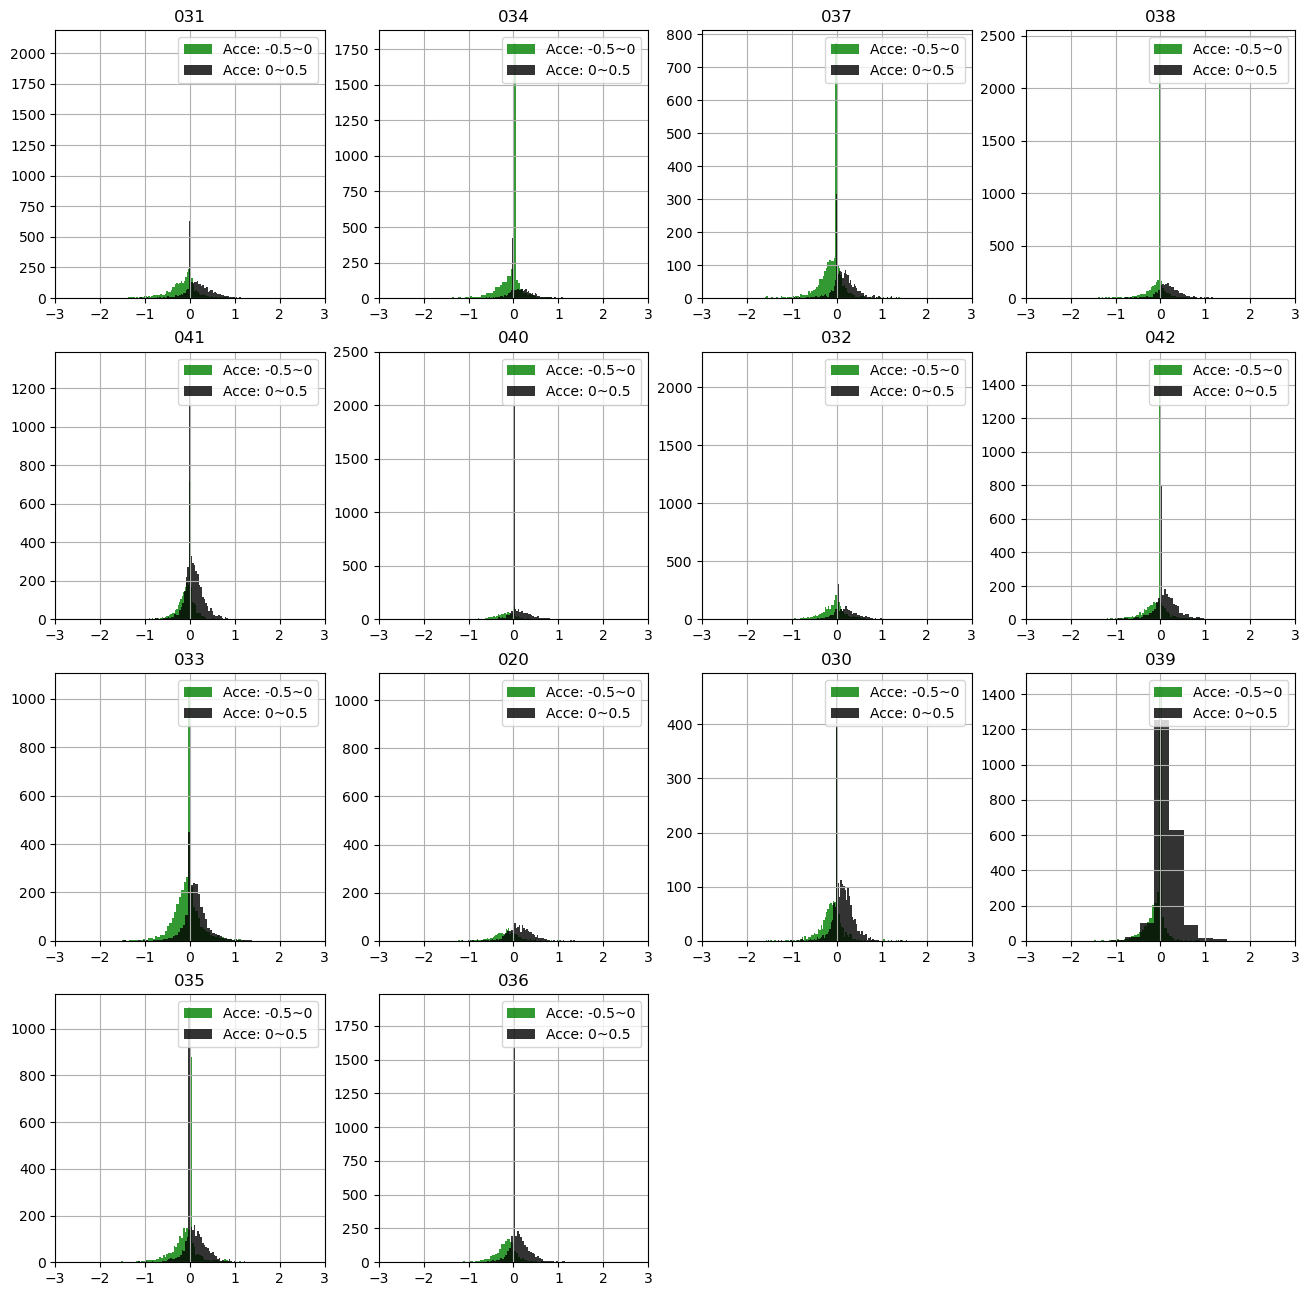

In [358]:
plt.figure(figsize=[16,16])
for i in range(0,14):
    plt.subplot(4,4,i+1)
    index_1 = transfer(np.where(A_all_Acce[i] <= -1)[0])
    index_2 = transfer(np.where(A_all_Acce[i] <= -0.5)[0])
    index_3 = transfer(np.where(A_all_Acce[i] <= 0)[0])
    index_4 = transfer(np.where(A_all_Acce[i] <= 0.5)[0])
    index_5 = transfer(np.where(A_all_Acce[i] <= 1)[0])
    index_6 = transfer(np.where(A_all_Acce[i] <= 4)[0])
    a = list(index_1)
    b = list(index_2-index_1)
    c = list(index_3-index_2)
    d = list(index_4-index_3)
    e = list(index_5-index_4)
    f = list(index_6-index_5)
    # plt.hist(A_all_GPS_acce[i][a], bins=100, color='red', alpha=0.8, label='Acce: <=-1')
    # plt.hist(A_all_GPS_acce[i][b], bins=100, color='purple', alpha=0.8, label='Acce: -1~-0.5')
    plt.hist(A_all_GPS_acce[i][c], bins=100, color='green', alpha=0.8, label='Acce: -0.5~0')
    plt.hist(A_all_GPS_acce[i][d], bins=100, color='black', alpha=0.8,label='Acce: 0~0.5')
    # plt.hist(A_all_GPS_acce[i][e], bins=100, color='blue', alpha=0.8,label='Acce: 0.5~1')
    # plt.hist(A_all_GPS_acce[i][f], bins=100, color='pink', alpha=0.8,label='Acce: >=1')
    plt.xlim([-3,3])
    ax = plt.gca()
    # ax.set_yscale('log')
    plt.title(file_name[i].split('_')[0])
    plt.grid()
    plt.legend()
    # plt.ylabel('GPS Acce')
    # plt.xlabel('WHEEL Acce')

# distribution of gps/wheel acce on emission value

In [ ]:
plt.figure(figsize=[12,54])
for i in range(14):
    for j in range(3):
        plt.subplot(14,3,i*3+1+j)
        if j ==0:
            plt.scatter(A_all_Acce[i], A_all_Emission[i],  s=1, c='black', label='Acceleration')
        elif j ==1:
            plt.scatter(A_all_GPS_acce[i], A_all_Emission[i], s=1, c='green', label='GPS Acceleration')
        else:
            plt.scatter(A_all_WHEEL_acce[i], A_all_Emission[i], s=1, c='red', label='WHEEL Acceleration')
        plt.title(file_name[i].split('_')[0])
        plt.legend()
        plt.grid()
# plt.subplot(1,3,2)
# plt.scatter(Acce,WHEEL_speed,  s=1, c='red', label='WHEEL Speed')
# plt.xlabel('Acceleration')
# plt.legend()
# plt.grid()
# plt.subplot(1,3,3)
# plt.scatter(Acce,WHEEL_speed,  s=1, c='red', label='WHEEL Speed')
# plt.scatter(Acce,GPS_speed,  s=1, c='green', label='GPS Speed')
# plt.grid()



In [ ]:
a = 1000
b = 1200
plt.plot(A[a:b, 0], A[a:b, -1], c='black',)
# plt.plot(A[a:b, 0], A[a+1:b+1, -1]-A[a:b, -1], c='red',)
plt.plot(A[a:b, 0], A[a+1:b+1, -1]+A[a:b, -1], c='green',alpha=0.2)
from scipy.fft import fft, ifft
E = A[a+1:b+1, -1]-A[a:b, -1]
E_1 = E[1:]-E[:-1]
# plt.plot(A[a:b, 0][:-1], E_1, c='black',alpha=0.2)
Y_E =fft(E)
Y_E